## TASK 4: Classification with Logistic Regression 

<div style="text-align: right; font-size: 20px;"><strong>SUBMITTED BY : ARJUN UNNIKRISHNAN</strong></div>



### 1. Load dataset and preprocess

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data.csv")

if 'id' in df.columns:
    df = df.drop(columns='id')

# 'diagnosis' is the target: M = 1 (malignant), B = 0 (benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(columns='diagnosis')
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


C:\Users\ARJUN\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\ARJUN\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\ARJUN\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


### 2.Train logistic regression model

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)



LogisticRegression()

### 3. Evaluate model

In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

y_pred = model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))


Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC: 0.99737962659679


### 4. Tune threshold

In [17]:
import numpy as np

probs = model.predict_proba(X_test_scaled)[:, 1]
threshold = 0.4 
y_pred_custom = (probs >= threshold).astype(int)

print("Confusion Matrix (threshold=0.4):\n", confusion_matrix(y_test, y_pred_custom))


Confusion Matrix (threshold=0.4):
 [[70  1]
 [ 1 42]]


### 5. Plot ROC Curve

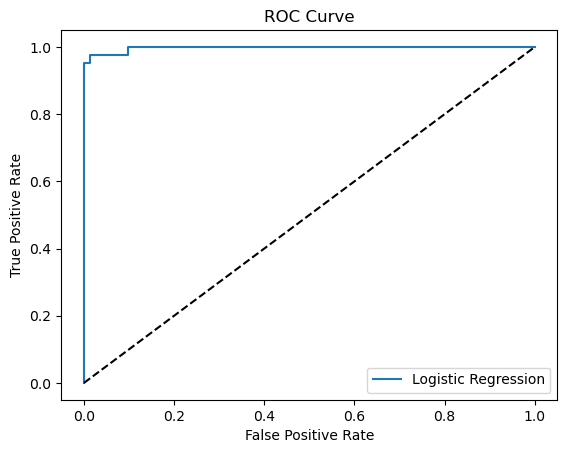

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Sigmoid Function
#### The sigmoid function is a mathematical function used in logistic regression to map any real-valued number into the range between 0 and 1. It is defined as σ(z) = 1 / (1 + e^(-z)), where z is the linear combination of input features and model weights. This output represents the predicted probability that a given input belongs to the positive class. The sigmoid curve is S-shaped, and its output is interpreted as a probability, which is why it's perfect for binary classification tasks. By adjusting the decision threshold (commonly 0.5), we can control the trade-off between sensitivity (recall) and specificity (precision) depending on the application’s needs.